<a href="https://colab.research.google.com/github/Sreetam/probable-parakeet/blob/main/News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from dateutil.parser import parse
import time
import matplotlib.pyplot as plt

In [2]:
rss_list = pd.read_csv('https://raw.githubusercontent.com/Sreetam/probable-parakeet/main/rss.csv')
col = ['title', 'description', 'link', 'pubDate', 'timestamp', 'rss']

In [3]:
articles = []
for rss in rss_list['rss-url']:
  try:
    for i in range(5):
      r = requests.get(rss, timeout=0.5)
      if r.status_code==200:
        break
    soupContent = BeautifulSoup(r.content,features='xml')
    items = soupContent.findAll('item')
    if r.status_code==200 and len(items)!=0:
      print('Total News Content: ' + str(len(items)) + ' : Success: ' + str(r.status_code) + " : " + rss)
    else:
      print('Total News Content: 0 : Fail: ' + str(r.status_code) + ' : ' + rss)
      continue
  except:
    print('Total News Content: 0 : Fail: 404 : ' + rss)
    continue
  for i in items:
    article = []
    try: article.append(i.find('title').text)
    except: article.append('')
    try: article.append(i.find('description').text)
    except: article.append('')
    try: article.append(i.find('link').text)
    except: article.append('')
    try:
      article.append(parse(i.find('pubDate').text, fuzzy=True))
      article.append(parse(i.find('pubDate').text, fuzzy=True).timestamp())
    except:
       article.append(np.NaN)
       article.append(np.NaN)
    article.append(rss)
    articles.append(article)
news = pd.DataFrame(articles, columns=col).drop_duplicates()
news = news.dropna()
news = news.loc[news.timestamp>(time.time() - 24*60*60)]
news = news.sort_values(by='timestamp', ascending=False)

Total News Content: 25 : Success: 200 : http://feeds.abcnews.com/abcnews/usheadlines
Total News Content: 0 : Fail: 404 : http://rss.cnn.com/rss/cnn_topstories.rss
Total News Content: 30 : Success: 200 : http://www.cbsnews.com/latest/rss/main
Total News Content: 20 : Success: 200 : http://rss.csmonitor.com/feeds/usa
Total News Content: 25 : Success: 200 : http://feeds.nbcnews.com/feeds/topstories
Total News Content: 25 : Success: 200 : http://feeds.nbcnews.com/feeds/worldnews
Total News Content: 31 : Success: 200 : http://www.huffingtonpost.com/feeds/verticals/world/index.xml
Total News Content: 38 : Success: 200 : http://feeds.bbci.co.uk/news/world/us_and_canada/rss.xml
Total News Content: 50 : Success: 200 : http://news.yahoo.com/rss/us
Total News Content: 50 : Success: 200 : http://rss.news.yahoo.com/rss/world
Total News Content: 51 : Success: 200 : http://qz.com/feed
Total News Content: 30 : Success: 200 : http://www.theguardian.com/world/usa/rss
Total News Content: 50 : Success: 20

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Total News Content: 30 : Success: 200 : http://www.salon.com/category/news/feed/rss/
Total News Content: 10 : Success: 200 : http://time.com/newsfeed/feed/
Total News Content: 10 : Success: 200 : http://feeds.foxnews.com/foxnews/latest?format=xml
Total News Content: 30 : Success: 200 : http://www.politico.com/rss/magazine.xml
Total News Content: 10 : Success: 200 : http://www.politico.com/rss/Top10Blogs.xml


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Total News Content: 31 : Success: 200 : http://www.huffingtonpost.com/feeds/verticals/politics/index.xml
Total News Content: 0 : Fail: 404 : http://rss.cnn.com/rss/cnn_allpolitics.rss
Total News Content: 20 : Success: 200 : http://rss.nytimes.com/services/xml/rss/nyt/Politics.xml
Total News Content: 20 : Success: 200 : http://rss.nytimes.com/services/xml/rss/nyt/Upshot.xml
Total News Content: 20 : Success: 200 : http://thecaucus.blogs.nytimes.com/feed/
Total News Content: 10 : Success: 200 : http://www.rollcall.com/rss/all_news.xml
Total News Content: 50 : Success: 200 : http://www.thenation.com/rss/articles
Total News Content: 20 : Success: 200 : http://www.washingtontimes.com/rss/headlines/news/politics/
Total News Content: 20 : Success: 200 : http://dailycaller.com/section/politics/feed/
Total News Content: 20 : Success: 200 : https://www.nationalreview.com/rss.xml
Total News Content: 83 : Success: 200 : http://feeds.feedburner.com/DrudgeReportFeed
Total News Content: 50 : Success: 

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname BST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Total News Content: 16 : Success: 200 : http://feeds.bbci.co.uk/sport/0/rss.xml?edition=uk
Total News Content: 30 : Success: 200 : http://metro.co.uk/sport/feed/
Total News Content: 10 : Success: 200 : http://feeds.skynews.com/feeds/rss/technology.xml
Total News Content: 20 : Success: 200 : http://techcrunch.com/europe/feed/
Total News Content: 10 : Success: 200 : http://www.techrepublic.com/rssfeeds/blog/european-technology/
Total News Content: 50 : Success: 200 : http://feeds.theguardian.com/theguardian/technology/rss
Total News Content: 27 : Success: 200 : http://feeds.bbci.co.uk/news/technology/rss.xml#
Total News Content: 10 : Success: 200 : http://feeds.webservice.techradar.com/rss/new
Total News Content: 20 : Success: 200 : http://syndication.eonline.com/syndication/feeds/rssfeeds/topstories.xml?edition=uk
Total News Content: 30 : Success: 200 : http://metro.co.uk/entertainment/showbiz/feed/
Total News Content: 10 : Success: 200 : http://feeds.skynews.com/feeds/rss/entertainment

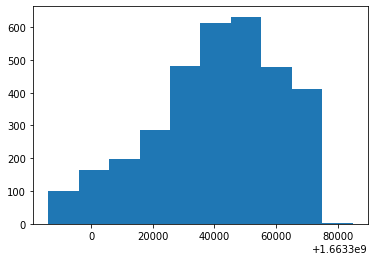

In [24]:
plt.hist(news.timestamp)
plt.show() 

In [23]:
news

,title,description,link,pubDate,timestamp,rss
3214,10 Marvel And DC Costars And Crew Who Fell In ...,"<h1>Over the years, many celeb couples have fo...",https://www.buzzfeed.com/kristenharris1/marvel...,2022-09-16 23:21:03-04:00,1.663385e+09,http://www.buzzfeed.com/tvandmovies.xml
3215,15 Times Female Stars Thought Their Movie Cost...,"<h1>""I'm running around in, like, a bra and un...",https://www.buzzfeed.com/hannahmarder/tv-and-m...,2022-09-16 23:16:02-04:00,1.663385e+09,http://www.buzzfeed.com/tvandmovies.xml
3216,Ana De Armas Is Good In “Blonde.” Too Bad The ...,<h1>Ana de Armas’s star turn enlivens Netflix'...,https://www.buzzfeednews.com/article/alessadom...,2022-09-16 22:27:46-04:00,1.663382e+09,http://www.buzzfeed.com/tvandmovies.xml
3217,18 Actors And Directors Who Had The Perfect Re...,<h1>The executive producer of Lord of the Ring...,https://www.buzzfeed.com/mychalthompson/racist...,2022-09-16 20:16:02-04:00,1.663374e+09,http://www.buzzfeed.com/tvandmovies.xml
7951,Hales eager to seize unexpected England chance...,Alex Hales admits he thought his England caree...,https://www.skysports.com/cricket/news/12040/1...,2022-09-16 23:35:00,1.663371e+09,"http://www.skysports.com/rss/0,20514,12040,00.xml"
...,...,...,...,...,...,...
1612,Prescription sleeping pills: What's right for ...,,http://www.mayoclinic.org/diseases-conditions/...,2022-09-16 00:00:00,1.663286e+09,http://www.mayoclinic.org/rss/all-health-infor...
9391,Are You One of 8 Million Aussies Using Someone...,<p>Using someone else's streaming password? Yo...,http://feeds.gizmodo.com.au/~/711662967/0/gizm...,2022-09-15 23:59:09+00:00,1.663286e+09,http://feeds.gizmodo.com.au/gizmodoaustraliaau
4137,Sins of a Solar Empire 2 Is Coming,<p>Ironclad Games has confirmed that Sins of a...,https://cogconnected.com/2022/09/sins-of-a-sol...,2022-09-15 23:59:02+00:00,1.663286e+09,http://cogconnected.com/feed/
9151,Call for UN torture watchdog to investigate Au...,<p>Detainees report feeling humiliated sitting...,https://www.theguardian.com/australia-news/202...,2022-09-15 23:56:55+00:00,1.663286e+09,http://www.theguardian.com/world/australian-po...
